In [1]:
## import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import operator
import gmaps

from google_maps_key import gkey

In [2]:
## use pandas to import data csv, read, and convert to a dataframe
filepath= os.path.join('..', 'Data','clean_data','clean_data.csv')
df = pd.read_csv(filepath)
df.head()

,incident_id,date,state,city_or_county,latitude,longitude,location_description,n_killed,n_injured,n_guns_involved,...,gun_type,participant_age,participant_age_group,participant_gender,participant_status,participant_type,incident_characteristics,source_url,Population,incidents per 10k
0,461105,2013-01-01,Pennsylvania,Mckeesport,40.3467,-79.8559,NaN,0,4,NaN,...,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Shot - Wounded/Injured||Mass Shooting (4+ vict...,http://www.post-gazette.com/local/south/2013/0...,12790505.0,6.980960
1,460726,2013-01-01,California,Hawthorne,33.9090,-118.3330,NaN,1,3,NaN,...,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",http://www.dailybulletin.com/article/zz/201301...,38982847.0,4.182865
2,478855,2013-01-01,Ohio,Lorain,41.4455,-82.1377,Cotton Club,1,3,2.0,...,0::Unknown||1::Unknown,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",http://chronicle.northcoastnow.com/2013/02/14/...,11609756.0,8.823614
3,478925,2013-01-05,Colorado,Aurora,39.6518,-104.8020,NaN,4,0,NaN,...,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,"Shot - Dead (murder, accidental, suicide)||Off...",http://www.dailydemocrat.com/20130106/aurora-s...,5436519.0,5.887959
4,478959,2013-01-07,North Carolina,Greensboro,36.1140,-79.9569,NaN,2,2,2.0,...,0::Handgun||1::Handgun,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,"Shot - Wounded/Injured||Shot - Dead (murder, a...",http://www.journalnow.com/news/local/article_d...,10052564.0,8.693305


In [16]:
## create dataframe of total incidents per state 
incident_df=df.groupby(['state'])
incident_df=pd.DataFrame(incident_df['incident_id'].count())
incident_df=incident_df.rename(columns = {'incident_id': 'Number of incidents'})
## pull incidents per capita by state 
cap=df.groupby(['state'])
cap_df=pd.DataFrame(cap['incidents per 10k'].first())
cap_df=cap_df.sort_values(by = ['incidents per 10k'], ascending  = False)
cap_df=cap_df.reset_index()
## pull 5 year population for each state
pop=df.groupby(['state'])
pop_df=pd.DataFrame(pop['Population'].first())
## merge per capita and population dataframes
cap_pop=pd.merge(cap_df,pop_df,on='state',how='left')
#merge incidents and per capita/population dataframes
totals_df=pd.merge(incident_df,cap_pop,on='state',how='left')
## get total number killed per state
k_count=df.groupby(['state'])
k_count_df=pd.DataFrame(k_count['n_killed'].sum())
k_count_df =k_count_df.rename(columns = {'n_killed': 'total_killed'})
## get total number injured per state
i_count=df.groupby(['state'])
i_count_df=pd.DataFrame(i_count['n_injured'].sum())
i_count_df =i_count_df.rename(columns = {'n_injured': 'total_injured'})
## merge the total killed and total injured dataframes
k_i_count=pd.merge(k_count_df,i_count_df,on='state',how='outer')
## merge the total killed & injured dataframe to the totals dataframe
totals_df=pd.merge(totals_df,k_i_count,on='state',how='outer')
## add columns to dataframe with killed per capita and injured per capita
totals_df['k per 10k']=totals_df['total_killed']/(totals_df['Population']/10000)
totals_df['in per 10k']=totals_df['total_injured']/(totals_df['Population']/10000)
totals_df.head()

,state,Number of incidents,incidents per 10k,Population,total_killed,total_injured,k per 10k,in per 10k
0,Alabama,5471,11.278619,4850771.0,1880,2998,3.875673,6.180461
1,Alaska,1349,18.265149,738565.0,267,325,3.615119,4.400425
2,Arizona,2328,3.418529,6809946.0,1094,1096,1.606474,1.609411
3,Arkansas,2842,9.543497,2977944.0,773,1347,2.595751,4.523255
4,California,16306,4.182865,38982847.0,5562,7644,1.426781,1.960862


## Top 10 States by Number of Total Incidents and Number of Incidents per Capita

In [4]:
## create dataframe for top ten states by total number of incidents
totals_df=totals_df.sort_values(by = ['Number of incidents'], ascending  = False)
totals_df=totals_df.reset_index(drop=True)
totals_df.head(10)

topten=totals_df.iloc[0:10,0:3]
topten

,state,Number of incidents,incidents per 10k
0,Illinois,17556,13.657446
1,California,16306,4.182865
2,Florida,15029,7.411317
3,Texas,13577,4.951565
4,Ohio,10244,8.823614
5,New York,9712,4.905490
6,Pennsylvania,8929,6.980960
7,Georgia,8925,8.748598
8,North Carolina,8739,8.693305
9,Louisiana,8103,17.375507


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

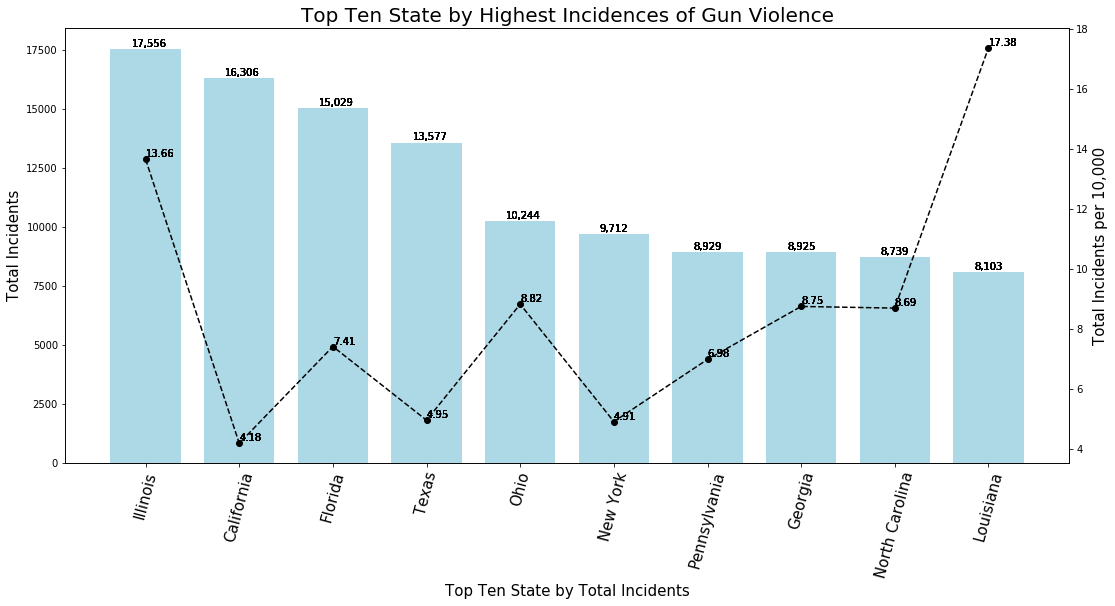

In [68]:
incidents=topten['Number of incidents'].tolist()
per_capita=topten['incidents per 10k'].tolist()
x_axis = topten['state']
width=0.75
x=np.arange(len(x_axis))
fig, axes=plt.subplots(figsize=(18,8))
axes.bar(x_axis, topten['Number of incidents'], color="lightblue", align="center", width=width)
axes.set_xticks(x)
axes.set_xticklabels(x_axis,rotation = 75, fontsize=15)
axes.set_ylabel('Total Incidents', fontsize=15)
axes.set_xlabel('Top Ten State by Total Incidents', fontsize=15)
axes2 = axes.twinx()
axes2.plot(x_axis,topten['incidents per 10k'],'o--k')
axes2.set_ylabel('Total Incidents per 10,000', fontsize=15)
axes.set_title('Top Ten State by Highest Incidences of Gun Violence',fontsize=20)
for num in x:
    for i in incidents:
        axes.text(num-.15,incidents[num]+100,"{:,}".format(incidents[num]), c="black")
for num in x:
    for i in per_capita:
        axes2.text(num,per_capita[num],f'{round(per_capita[num],2)}',ha='left',va='bottom')
plt.tight_layout

In [6]:
## create dataframe for top ten states by total number of incidents per capita
totals_df=totals_df.sort_values(by = ['incidents per 10k'], ascending  = False)
totals_df=totals_df.reset_index(drop=True)
totals_df.head(10)

topten_pc=totals_df.iloc[0:10,0:3]
topten_pc

,state,Number of incidents,incidents per 10k
0,District of Columbia,3195,47.516995
1,Alaska,1349,18.265149
2,Delaware,1685,17.854645
3,Louisiana,8103,17.375507
4,South Carolina,6939,14.180197
5,Illinois,17556,13.657446
6,Mississippi,3599,12.052026
7,Tennessee,7626,11.559132
8,Alabama,5471,11.278619
9,Missouri,6631,10.914687


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

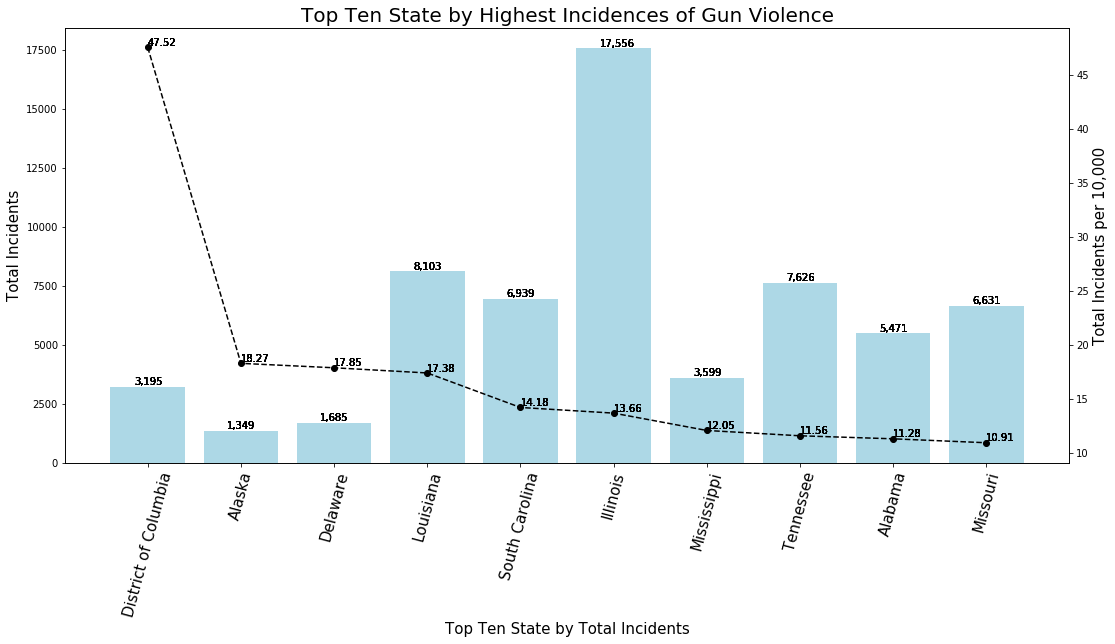

In [72]:
incidents=topten_pc['Number of incidents'].tolist()
per_capita=topten_pc['incidents per 10k'].tolist()
x_axis = topten_pc['state']
width=0.75
x=np.arange(len(x_axis))
fig, axes=plt.subplots(figsize=(18,8))
axes.bar(x_axis, topten_pc['Number of incidents'], color="lightblue", align="center")
axes.set_xticklabels(x_axis,rotation = 75, fontsize=15)
axes.set_ylabel('Total Incidents', fontsize=15)
axes.set_xlabel('Top Ten State by Total Incidents', fontsize=15)
axes2 = axes.twinx()
axes2.plot(x_axis,topten_pc['incidents per 10k'], 'o--k')
axes2.set_ylabel('Total Incidents per 10,000', fontsize=15)
axes.set_title('Top Ten State by Highest Incidences of Gun Violence',fontsize=20)
for num in x:
    for i in incidents:
        axes.text(num-.15,incidents[num]+100,"{:,}".format(incidents[num]), c="black")
for num in x:
    for i in per_capita:
        axes2.text(num,per_capita[num],f'{round(per_capita[num],2)}',ha='left',va='bottom')
plt.tight_layout

## Top Ten States by Number Killed per capita 
Looking at the data specific to the top ten states by killed per capita (incidents per capita by 10,000)

In [17]:
## sort dataframe by killed per capita greatest to least
totals_df=totals_df.sort_values(by = ['k per 10k'], ascending  = False)
totals_df=totals_df.reset_index(drop=True)
## create list of top ten states for killed per capita
kten=totals_df.iloc[0:10,0]
k_topten=[]
for s in kten:
    k_topten.append(s)
## create a dataframe for subset of the totals dataframe for top ten states by killed per capita
totals_df['state'].isin(k_topten)
k_topten_df=totals_df[totals_df['state'].isin(k_topten)]   
## create lists for columns that will need to become labels on plot
killed=k_topten_df['total_killed'].tolist()
injured=k_topten_df['total_injured'].tolist()
incidents=k_topten_df['Number of incidents'].tolist()
k_10k=k_topten_df['k per 10k'].tolist()

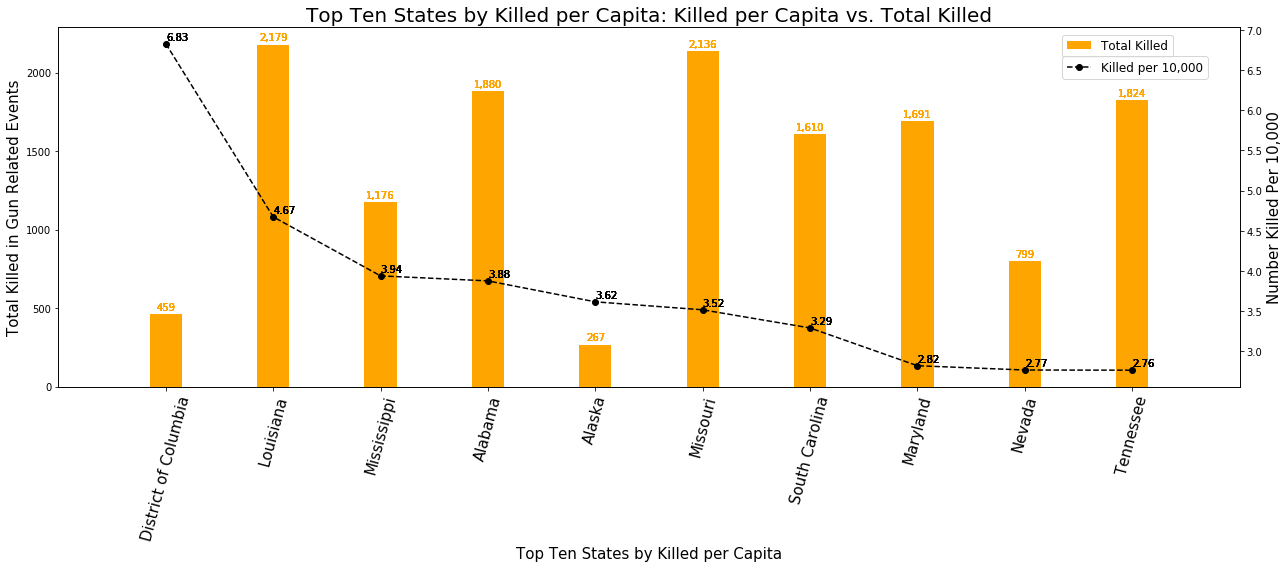

In [31]:
## plot the top ten states for killed per capita showing killed per capita vs. total killed
x=np.arange(len(k_topten))
width=0.30

fig, killed_10k=plt.subplots(figsize=(18,8))
killed_10k.bar(x=x, height=killed,label='Total Killed',color='orange', width=width)
killed_10k2=killed_10k.twinx()
killed_10k2.plot(x, k_10k,'o--k',label='Killed per 10,000')
killed_10k2.set_ylabel('Number Killed Per 10,000',fontsize=15) 
killed_10k.set_xticks(x)
killed_10k.set_xticklabels(k_topten, rotation=75, fontsize=15)
killed_10k.set_xlim(-1,10)
killed_10k.set_ylabel('Total Killed in Gun Related Events',fontsize=15)
killed_10k.set_xlabel('Top Ten States by Killed per Capita',fontsize=15)
killed_10k.set_title('Top Ten States by Killed per Capita: Killed per Capita vs. Total Killed',fontsize=20)
killed_10k.legend(bbox_to_anchor=(.85, .98), loc='upper left', borderaxespad=0.,fontsize='large')
killed_10k2.legend(bbox_to_anchor=(.85, .92), loc='upper left', borderaxespad=0.,fontsize='large')
for num in x:
    for inc in k_10k: 
        killed_10k2.text(num,k_10k[num]+.05,f'{round(k_10k[num],2)}',ha='left')
for num in x:
    for inc in killed: 
        killed_10k.text(num,killed[num]+25,"{:,}".format(killed[num]),c='orange',ha='center')
plt.tight_layout()
plt.savefig('output/Top10KilledperCapita.png')
plt.show()

# Top Ten States by Number Injured per capita 
Looking at the data specific to the top ten states by injured per capita (incidents per capita by 10,000)

In [10]:
## sort dataframe by injured per capita greatest to least
totals_df=totals_df.sort_values(by = ['in per 10k'], ascending  = False)
totals_df=totals_df.reset_index(drop=True)
totals_df.head(10)
## create lists for columns that will need to become labels on plot
iten=totals_df.iloc[0:10,0]
i_topten=[]
for s in iten:
    i_topten.append(s)
i_topten
## create a dataframe for subset of the totals dataframe for top ten states by injured per capita
totals_df['state'].isin(i_topten)
i_topten_df=totals_df[totals_df['state'].isin(i_topten)]   
i_topten_df
## create lists for columns that will need to become labels on plot
killed=i_topten_df['total_killed'].tolist()
injured=i_topten_df['total_injured'].tolist()
incidents=i_topten_df['Number of incidents'].tolist()
i_10k=i_topten_df['in per 10k'].tolist()

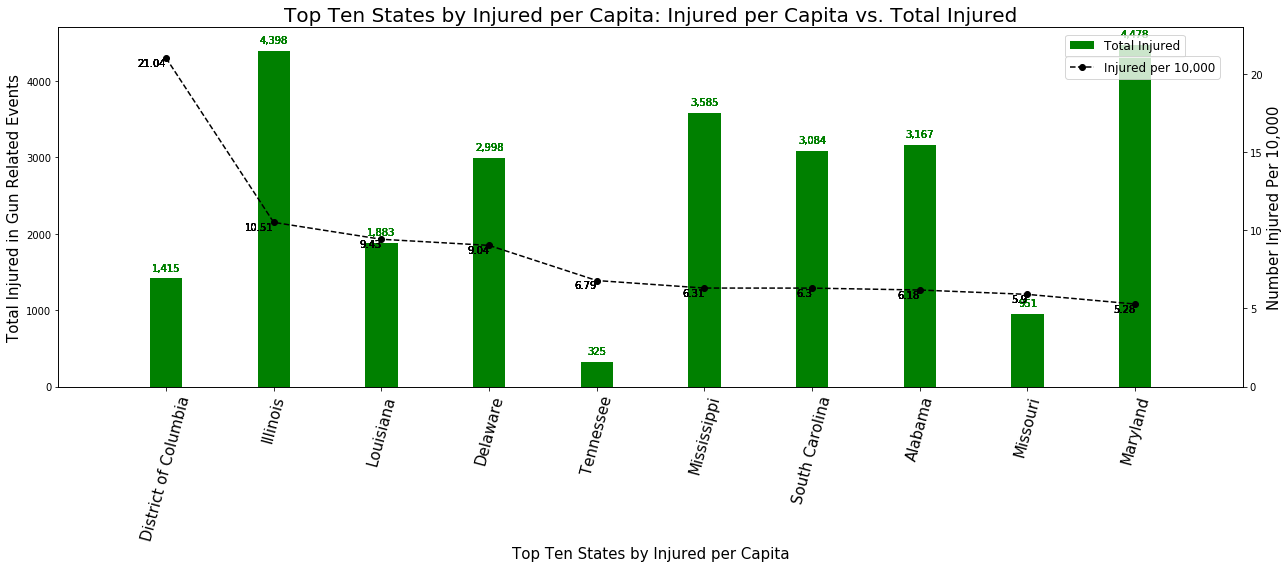

In [32]:
## plot the top ten states for injured per capita showing injured per capita vs. total injured
x=np.arange(len(i_topten))
width=0.30

fig, injured_10k=plt.subplots(figsize=(18,8))
injured_10k.bar(x=x, height=injured, label='Total Injured',color='green', width=width)
injured_10k2=injured_10k.twinx()
injured_10k2.plot(x, i_10k,'o--k',label='Injured per 10,000')
injured_10k2.set_ylabel('Number Injured Per 10,000',fontsize=15) 
injured_10k2.set_ylim(0,23)
injured_10k.set_xticks(x)
injured_10k.set_xticklabels(i_topten, rotation=75, fontsize=15)
injured_10k.set_xlim(-1,10)
injured_10k.set_ylabel('Total Injured in Gun Related Events',fontsize=15)
injured_10k.set_xlabel('Top Ten States by Injured per Capita',fontsize=15)
injured_10k.set_title('Top Ten States by Injured per Capita: Injured per Capita vs. Total Injured',fontsize=20)
injured_10k2.legend(bbox_to_anchor=(.85, .92), loc='upper left', borderaxespad=0.,fontsize='large')
injured_10k.legend(bbox_to_anchor=(.85, .98), loc='upper left', borderaxespad=0.,fontsize='large')
for num in x:
    for inc in i_10k: 
        injured_10k2.text(num,i_10k[num],f'{round(i_10k[num],2)}',ha='right',va='top')
for num in x:
    for inc in injured: 
        injured_10k.text(num,injured[num]+100,"{:,}".format(injured[num]),c='green',ha='center')
plt.tight_layout()
plt.savefig('output/Top10InjuredperCapita.png')
plt.show()

# Top Ten States by Killed (not per capita)
Look at how the top ten state results varry when looking at actual counts not per capita. 

In [33]:
## sort totals df by total killed greatest to least
totals_df
totals_df=totals_df.sort_values(by = ['total_killed'], ascending  = False)
totals_df=totals_df.reset_index(drop=True)
totals_df.head(10)
## create a list of the top ten states by total killed numbers
kraw=totals_df.iloc[0:10,0]
kraw_topten=[]
for s in kraw:
    kraw_topten.append(s)
kraw_topten
## create new dataframe including only the top ten states based on total killed
totals_df['state'].isin(kraw_topten)
kraw_topten_df=totals_df[totals_df['state'].isin(kraw_topten)]   
kraw_topten_df
## create lists for fields to be plotted 
killed=kraw_topten_df['total_killed'].tolist()
injured=kraw_topten_df['total_injured'].tolist()
incidents=kraw_topten_df['Number of incidents'].tolist()
kraw_10k=kraw_topten_df['k per 10k'].tolist()

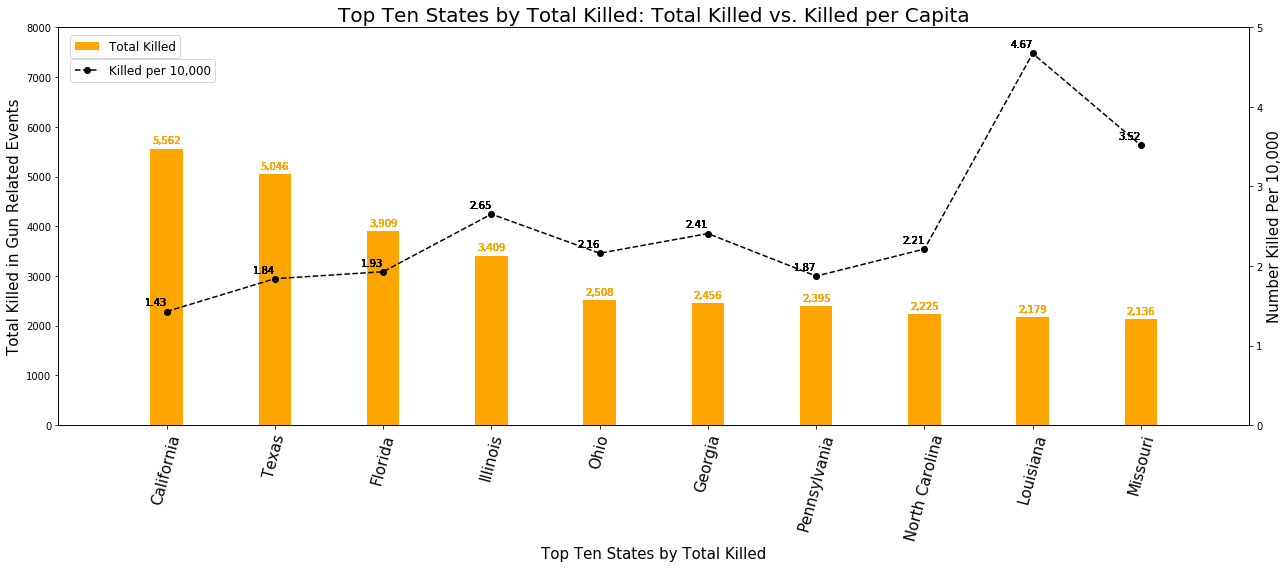

In [34]:
## plot the top ten states for total killed showing total killed vs. killed per capita
x=np.arange(len(kraw_topten))
width=0.30
# print(x)

fig, krawplt2=plt.subplots(figsize=(18,8))
krawplt2.bar(x=x, height=killed,label='Total Killed',color='orange', width=width)
krawplt22=krawplt2.twinx()
krawplt22.plot(x, kraw_10k,'o--k',label='Killed per 10,000')
krawplt22.set_ylabel('Number Killed Per 10,000',fontsize=15)
krawplt22.set_ylim(0,5)
krawplt2.set_xticks(x)
krawplt2.set_xticklabels(kraw_topten, rotation=75, fontsize=15)
krawplt2.set_xlim(-1,10)
krawplt2.set_ylim(0,8000)
krawplt2.set_ylabel('Total Killed in Gun Related Events',fontsize=15) 
krawplt2.set_xlabel('Top Ten States by Total Killed',fontsize=15)
krawplt2.set_title('Top Ten States by Total Killed: Total Killed vs. Killed per Capita',fontsize=20)
krawplt2.legend(bbox_to_anchor=(.01, .98), loc='upper left', borderaxespad=0.,fontsize='large')
krawplt22.legend(bbox_to_anchor=(.01, .92), loc='upper left', borderaxespad=0.,fontsize='large')
for num in x:
    for inc in killed: 
        krawplt2.text(num,killed[num]+100,"{:,}".format(killed[num]),c='orange',ha='center')
for num in x:
    for inc in kraw_10k: 
        krawplt22.text(num,kraw_10k[num]+.05,f'{round(kraw_10k[num],2)}',ha='right', va='bottom')
plt.tight_layout()
plt.savefig('output/TotalKilledTop10.png')
plt.show()

# Top Ten States by Injured (not per capita)
Look at how the top ten state results varry when looking at actual counts not per capita. 

In [14]:
## sort totals datafram by total injured greatest to least
totals_df
totals_df=totals_df.sort_values(by = ['total_injured'], ascending  = False)
totals_df=totals_df.reset_index(drop=True)
totals_df.head(10)
## create list of top ten states by total injured
iraw=totals_df.iloc[0:10,0]
iraw_topten=[]
for s in iraw:
    iraw_topten.append(s)
iraw_topten
## create dataframe including only the top ten state by total injured
totals_df['state'].isin(iraw_topten)
iraw_topten_df=totals_df[totals_df['state'].isin(iraw_topten)]   
iraw_topten_df
## create lists for fields to be plotted 
killed=iraw_topten_df['total_killed'].tolist()
injured=iraw_topten_df['total_injured'].tolist()
incidents=iraw_topten_df['Number of incidents'].tolist()
iraw_10k=iraw_topten_df['k per 10k'].tolist()

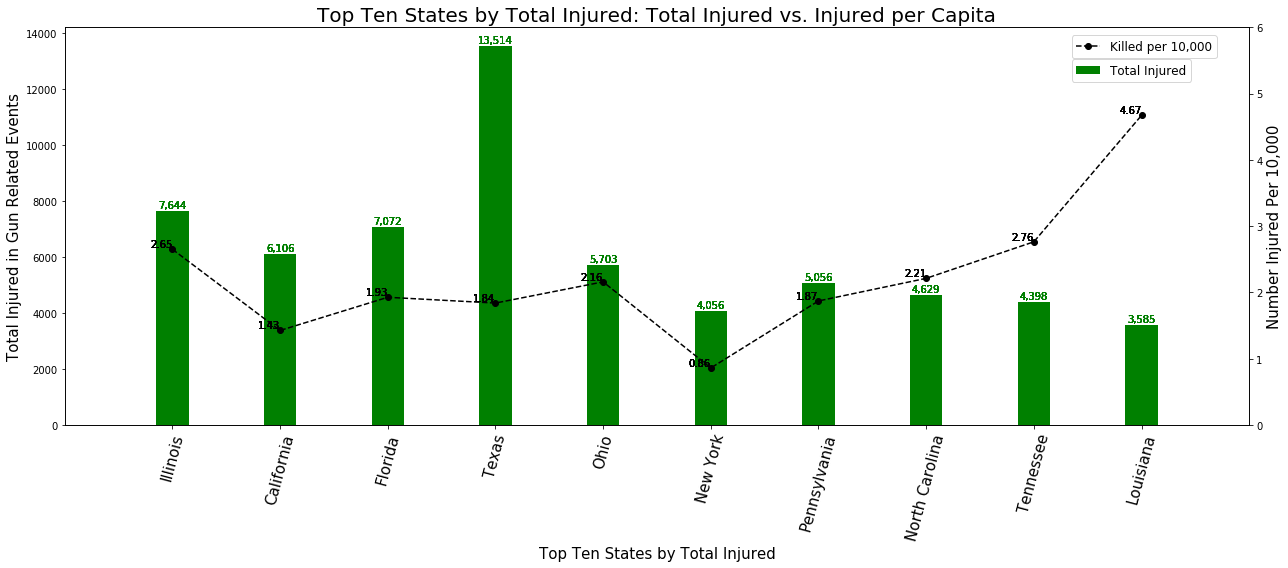

In [35]:
## plot the top ten states for total injured showing total injured vs. injured per capita
x=np.arange(len(iraw_topten))
width=0.30

fig, irawplt2=plt.subplots(figsize=(18,8))
irawplt2.bar(x=x, height=injured ,label='Total Injured',color='green', width=width)
irawplt22=irawplt2.twinx()
irawplt22.plot(x, iraw_10k,'o--k',label='Killed per 10,000')
irawplt22.set_ylabel('Number Injured Per 10,000',fontsize=15)
irawplt22.set_ylim(0,6)
irawplt2.set_xticks(x)
irawplt2.set_xticklabels(iraw_topten, rotation=75, fontsize=15)
irawplt2.set_xlim(-1,10)
# irawplt2.set_ylim(0,15000)
irawplt2.set_ylabel('Total Injured in Gun Related Events',fontsize=15) 
irawplt2.set_xlabel('Top Ten States by Total Injured',fontsize=15)
irawplt2.set_title('Top Ten States by Total Injured: Total Injured vs. Injured per Capita',fontsize=20)
irawplt2.legend(bbox_to_anchor=(.85, .92), loc='upper left', borderaxespad=0.,fontsize='large')
irawplt22.legend(bbox_to_anchor=(.85, .98), loc='upper left', borderaxespad=0.,fontsize='large')
for num in x:
    for inc in injured: 
        irawplt2.text(num,injured[num]+100,"{:,}".format(injured[num]),c='green',ha='center')
for num in x:
    for inc in iraw_10k: 
        irawplt22.text(num,iraw_10k[num],f'{round(iraw_10k[num],2)}',ha='right', va='bottom')
plt.tight_layout()
plt.savefig('output/TotalInjuredTop10.png')
plt.show()

## Top Types of Gun Violence Incidents

In [73]:
## use pandas to read incident type csv file and create a dataframe
file= os.path.join('output','incident_type_gmap.csv')
maps_df = pd.read_csv(file)
maps_df.head()

,Unnamed: 0,incident_id,latitude,longitude,Type
0,0,461105,40.3467,-79.8559,['Mass Shooting']
1,1,460726,33.9090,-118.3330,"['Gang involvement', 'suicide', 'Mass Shooting']"
2,2,478855,41.4455,-82.1377,"['suicide', 'No Injuries']"
3,3,478925,39.6518,-104.8020,"['Drug involvement', 'Officer Involved Inciden..."
4,4,478959,36.1140,-79.9569,"['Domestic Violence', 'suicide', 'Murder']"


In [74]:
top_five_inc = ['suicide','Officer Involved Incident','Armed robbery','No Injuries','Drug involvement']

suicides_lat = []
suicides_lon = []

officers_lat = []
officers_lon = []

armed_lat = []
armed_lon = []

injuries_lat = []
injuries_lon = []

drug_lat = []
drug_lon = []

for index, row in  maps_df.iterrows():
    if  top_five_inc[0] in row[3]:
        
        suicides_lat.append(row[2])
        suicides_lon.append(row[1])
        
    elif top_five_inc[1] in row[3]:
        
        officers_lat.append(row[2])
        officers_lon.append(row[1])
        
    elif top_five_inc[2] in row[3]:
        
        armed_lat.append(row[2])
        armed_lon.append(row[1])
        
    elif top_five_inc[3] in row[3]:
        
        injuries_lat.append(row[2])
        injuries_lon.append(row[1])
        
    elif top_five_inc[4] in row[3]:
        drug_lat.append(row[2])
        drug_lon.append(row[1])

TypeError: argument of type 'float' is not iterable